In [1]:

# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#time
import datetime as datetime


In [14]:
start = datetime.datetime(2015,1,5)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)
df_2492 = pdr.DataReader('2492.TW', 'yahoo', start=start)
df_3045 = pdr.DataReader('3045.TW', 'yahoo', start=start)
df_2412 = pdr.DataReader('2412.TW', 'yahoo', start=start)
df_2412.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,93.300003,92.599998,93.300003,93.000000,4423000.0,77.177879
2015-01-06,92.900002,92.099998,92.699997,92.500000,6703000.0,76.762955
2015-01-07,92.900002,92.300003,92.500000,92.500000,5999000.0,76.762955
2015-01-08,93.300003,92.699997,93.199997,92.800003,6113000.0,77.011917
2015-01-09,93.500000,92.800003,93.500000,93.000000,3736000.0,77.177879


In [15]:
df_total = pd.concat([df_2330['Adj Close'],df_2492['Adj Close'],df_3045['Adj Close'],df_2412['Adj Close']], axis=1)
df_total.columns=['2330', '2492', '3045', '2412']
df_total.head()

,2330,2492,3045,2412
Date,,,,
2015-01-05,121.474525,15.927438,104.0,77.177879
2015-01-06,116.249802,15.470522,101.5,76.762955
2015-01-07,116.685204,15.274700,100.5,76.762955
2015-01-08,120.168327,15.470522,104.5,77.011917
2015-01-09,116.685204,15.601070,105.5,77.177879


In [16]:
df_total.pct_change().mean()

2330    0.000804
2492    0.003145
3045    0.000085
2412    0.000350
dtype: float64

In [17]:
df_total.pct_change().corr()

,2330,2492,3045,2412
2330,1.000000,0.180468,0.231437,0.319622
2492,0.180468,1.000000,0.086338,0.068075
3045,0.231437,0.086338,1.000000,0.333820
2412,0.319622,0.068075,0.333820,1.000000


In [18]:
normed_ret=df_total/df_total.iloc[0]
normed_ret.head()

,2330,2492,3045,2412
Date,,,,
2015-01-05,1.000000,1.000000,1.000000,1.000000
2015-01-06,0.956989,0.971313,0.975962,0.994624
2015-01-07,0.960573,0.959018,0.966346,0.994624
2015-01-08,0.989247,0.971313,1.004808,0.997850
2015-01-09,0.960573,0.979509,1.014423,1.000000


In [19]:
df_total.pct_change().head()

,2330,2492,3045,2412
Date,,,,
2015-01-05,NaN,NaN,NaN,NaN
2015-01-06,-0.043011,-0.028687,-0.024038,-0.005376
2015-01-07,0.003745,-0.012658,-0.009852,0.000000
2015-01-08,0.029851,0.012820,0.039801,0.003243
2015-01-09,-0.028985,0.008439,0.009569,0.002155


In [20]:
log_ret = np.log(df_total/df_total.shift(1))
log_ret.head()

,2330,2492,3045,2412
Date,,,,
2015-01-05,NaN,NaN,NaN,NaN
2015-01-06,-0.043963,-0.029107,-0.024332,-0.005391
2015-01-07,0.003738,-0.012739,-0.009901,0.000000
2015-01-08,0.029414,0.012739,0.039029,0.003238
2015-01-09,-0.029414,0.008403,0.009524,0.002153


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C38A245FD0>,
      dtype=object)

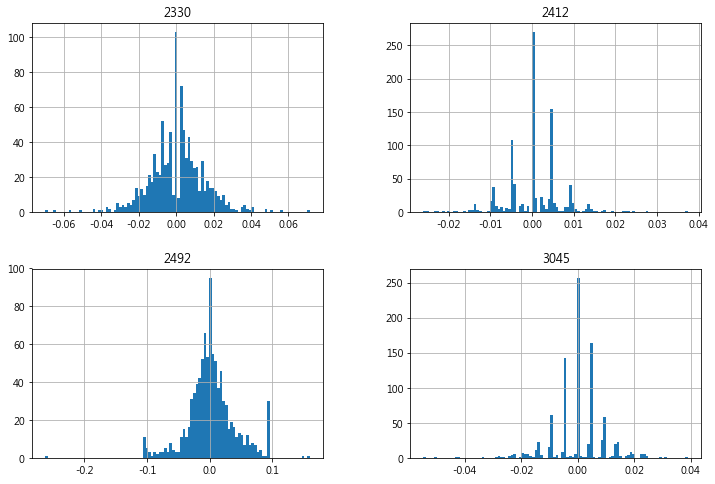

In [21]:
plt.rcParams['axes.unicode_minus']=False
log_ret.hist(bins=100, figsize=(12, 8))

In [22]:
log_ret.mean()

2330    0.000699
2492    0.002422
3045    0.000040
2412    0.000328
dtype: float64

In [23]:
log_ret.cov()

,2330,2492,3045,2412
2330,0.000209,0.000103,0.000032,0.000031
2492,0.000103,0.001440,0.000032,0.000018
3045,0.000032,0.000032,0.000089,0.000021
2412,0.000031,0.000018,0.000021,0.000044


In [16]:
weight = np.array([0.3, 0.2, 0.25, 0.25])
print('股票投資比重--->', weight)

exp_ret = np.sum((log_ret.mean() * weight )* 252)
print('投資組合的預期報酬--->', exp_ret)

exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov()*252, weight)))
print('預期波動性--->',exp_vol)

SR = exp_ret/exp_vol
print('夏普指數--->', SR)

股票投資比重---> [0.3  0.2  0.25 0.25]
投資組合的預期報酬---> 0.18986638440106773
預期波動性---> 0.17017725257437183
夏普指數---> 1.115697788798719
